# Who's that Pokémon?
## Data visualization analysis of Pokémon Types

This is a brief study of all Pokémon types, using simples analysis and visualizations.

The dataset is from Gurarako and you can get it [here.](https://www.kaggle.com/gurarako/basic-pandas-pokemon-dataset-part-1/data)

In [53]:
#all imports
import pandas as pd #dataframes
from bokeh.io import show,output_notebook, output_file #bar chart
from bokeh.models import HoverTool, ColumnDataSource #bar chart
from bokeh.plotting import figure #bar chart
from bokeh.core.properties import value #bar chart
import matplotlib.pyplot as plt #heatmap
import seaborn as sns #heatmap
from math import pi

#make charts visibles in jupyter notebook
%matplotlib inline 
output_notebook() 


Loading BokehJS ...

In [54]:
#using Pandas to import my csv file and create a data table
df = pd.read_csv('database/pokemonall.csv')
#make all rows uppercase
df['Type 1'] = df['Type 1'].str.upper()
df['Type 2'] = df['Type 2'].str.upper()
#sort by asceding
firstType = df['Type 1'].value_counts().sort_index(ascending=True)
secondType = df['Type 2'].value_counts().sort_index(ascending=True)

In [55]:
df.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,GRASS,POISON,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,GRASS,POISON,405,60,62,63,80,80,60,1,False


## Bar chart 

In [57]:
#creating a Bar chart with Bokeh
types = list(firstType.keys())
order = ["Primary", "Secondary"]
colors = ["#3182bd", "#9ecae1"]

source = ColumnDataSource(data = {'Types' : types,
        'Primary'   : list(firstType),
        'Secondary'   : list(secondType)})

hover=HoverTool(
     tooltips = [
        ('Primary', '@Primary'),
        ('Secondary', '@Secondary'),
        ('Type', '@Types'),
    ]
)


p = figure(x_range=types, plot_height=400, title="Types Counts by Order",
           toolbar_location=None, tools=[hover])

p.vbar_stack(order, x='Types', width=0.9, color=colors, source=source,
             legend=[value(x) for x in order])

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.background_fill_color = '#fdfdfd'
p.border_fill_color = "#fdfdfd"
p.outline_line_color = None
p.xaxis.major_label_orientation = pi/2
p.legend.location = "top_left"
p.legend.background_fill_color = '#fdfdfd'
p.legend.orientation = "vertical"
p.legend.spacing = 10
p.legend.padding = 20
p.legend.margin = 20



show(p)

output_file("bokeh.html")

In [35]:
indexNull = df[df['Type 2'].isnull()].index.tolist()
df2 = df.loc[indexNull,['Type 1']]
pureType = df2['Type 1'].value_counts().sort_index(ascending=True)

In [58]:
#creating a Bar chart with Bokeh
source = ColumnDataSource(data={
        'Types' : list(pureType.keys()),
        'Primary':list(pureType),
})


hover=HoverTool(
     tooltips = [
        ('Count', '@Primary'),
        ('Type', '@Types'),
    ]
)

p = figure(x_range=list(pureType.keys()), plot_height=400, 
title="One-Type Pokémon Count", toolbar_location=None, 
tools=[hover])

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.outline_line_color = None
p.xaxis.major_label_orientation = pi/2
p.background_fill_color = '#fdfdfd'
p.border_fill_color = "#fdfdfd"

p.vbar(x='Types', width=0.9, top='Primary',color="#3182bd", source=source)

show(p)
output_file("bokeh2.html")

## Heatmap

In [72]:
#making new Dataframe crossing Type 1 and 2
crosstab_df = pd.crosstab(df['Type 1'], df['Type 2'])
#adding a total column
crosstab_df['Total'] = crosstab_df.sum(axis=1)
crosstab_df.head()

Type 2,BUG,DARK,DRAGON,ELECTRIC,FAIRY,FIGHTING,FIRE,FLYING,GHOST,GRASS,GROUND,ICE,NORMAL,POISON,PSYCHIC,ROCK,STEEL,WATER,Total
Type 1,,,,,,,,,,,,,,,,,,,
BUG,0,0,0,4,2,4,2,14,1,6,2,0,0,12,0,3,7,3,60
DARK,0,0,4,0,0,2,3,5,2,0,0,2,0,0,2,0,2,0,22
DRAGON,0,0,0,1,1,2,1,6,0,0,5,3,0,0,4,0,0,0,23
ELECTRIC,0,0,1,0,2,0,1,5,1,1,0,1,2,0,0,0,4,1,19
FAIRY,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2


In [73]:
#adding a total row
finaltable = crosstab_df.append(pd.DataFrame(crosstab_df.sum(),
columns=['Total']).T, ignore_index=False)
#checking if worked
finaltable.tail()

Type 2,BUG,DARK,DRAGON,ELECTRIC,FAIRY,FIGHTING,FIRE,FLYING,GHOST,GRASS,GROUND,ICE,NORMAL,POISON,PSYCHIC,ROCK,STEEL,WATER,Total
BUG,0,0,0,4,2,4,2,14,1,6,2,0,0,12,0,3,7,3,60
DARK,0,0,4,0,0,2,3,5,2,0,0,2,0,0,2,0,2,0,22
DRAGON,0,0,0,1,1,2,1,6,0,0,5,3,0,0,4,0,0,0,23
ELECTRIC,0,0,1,0,2,0,1,5,1,1,0,1,2,0,0,0,4,1,19
FAIRY,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2


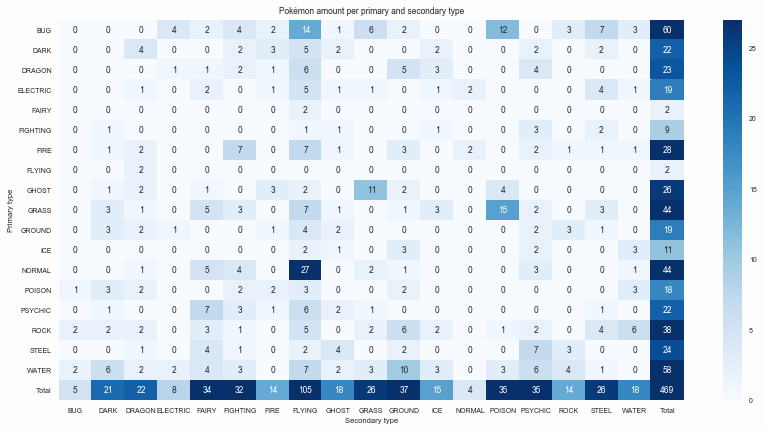

In [80]:
#creating heatmap
sns.set(font_scale=0.7)
plt.figure(figsize=(14,7), facecolor='#fdfdfd')
sns.heatmap(finaltable, cmap="Blues", annot=True, vmax=finaltable.loc[:'WATER', :'WATER'].values.max(),
vmin=finaltable.loc[:,  :'WATER'].values.min(), fmt='d')
plt.xlabel('Secondary type')
plt.ylabel('Primary type')
plt.title('Pokémon amount per primary and secondary type')
plt.show()

#### Thanks for reading and if you have any doubt, please contact me!

Visit my <a href="http://shiguelita.github.io">personal website</a>

Regards!

Talita Shiguemoto